In [1]:
import integrand_builder
import plot_util

In [2]:
compiled = integrand_builder.CompiledIntegrand()

In [3]:
compiled.p1 = [4, 0, 1, 1]
compiled.p2 = [3, 0, -1, 1]
compiled.m = 1-0.5j
compiled.thresh = 5

In [4]:
print(compiled.eval_integrated_counterterm([1,0,0]))
compiled.integrate_counterterm_axis(100,5_000, [1,0,0])

Compiling evaluator: "integrated_counter_term"
Done!
[-0.00014196+0.00026322j]


  0%|          | 0/100 [00:00<?, ?it/s]

Compiling evaluator: "counter_term"


  3%|▎         | 3/100 [00:01<00:43,  2.25it/s]

Done!


100%|██████████| 100/100 [00:04<00:00, 23.19it/s]


ComplexIntegratorResult:
value = (-0.000136±0.000001) + i(0.000263±0.000000)
relative absolute error = 0.27% , convergence=1.939, iters=500000

Compiling evaluator: "integrand"
Done!
Compiling evaluator: "subtracted"
Done!


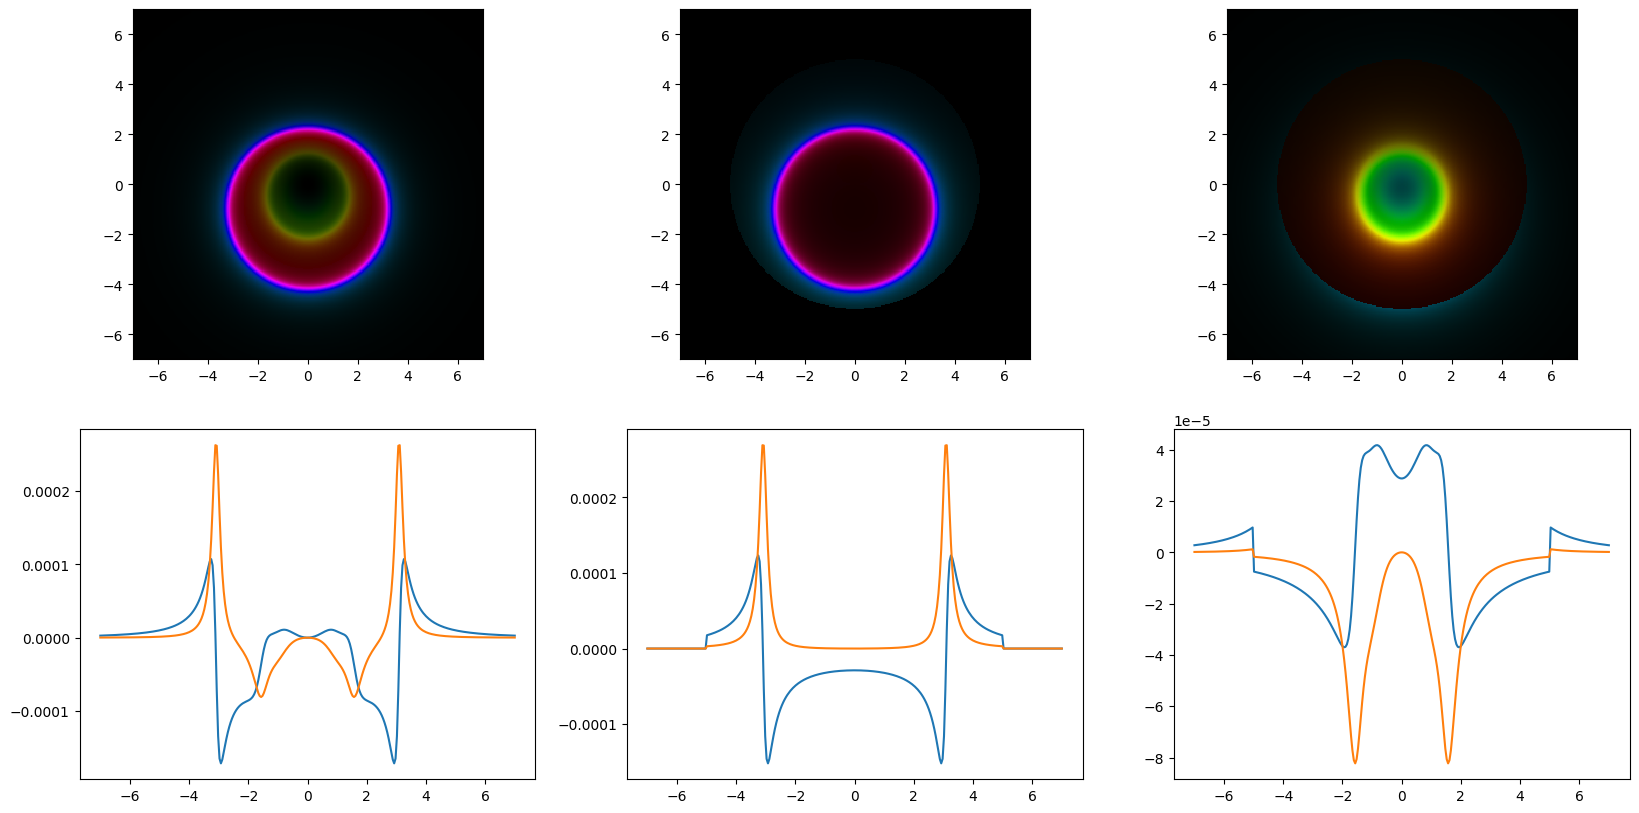

In [5]:
plot_util.plot_threshold_subtraction(compiled, (-7,7), (-7,7))

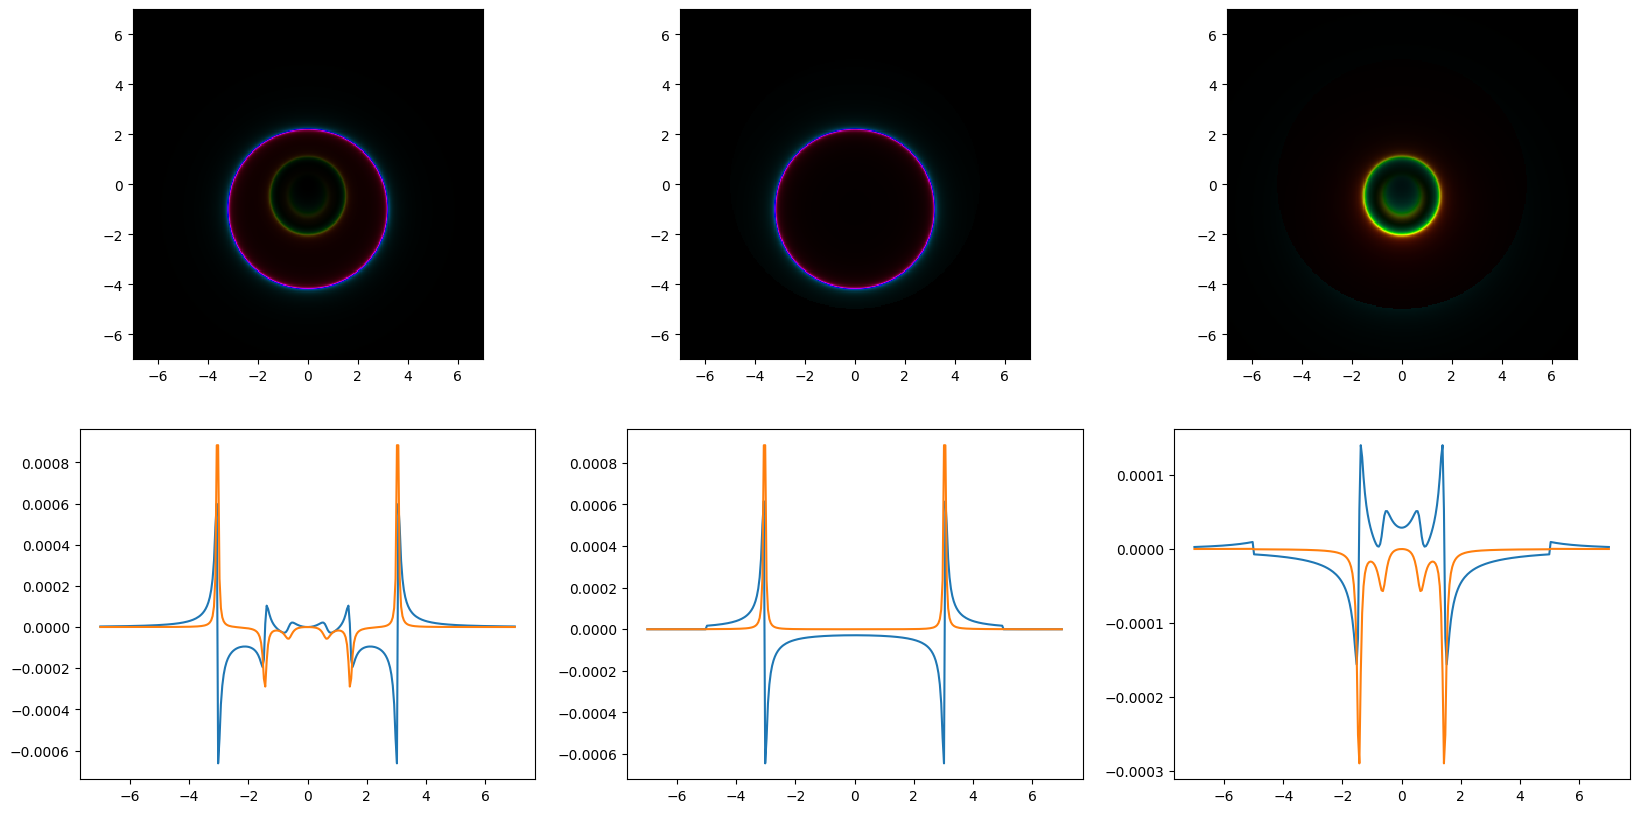

In [6]:
compiled.m = 1-0.1j
plot_util.plot_threshold_subtraction(compiled, (-7,7), (-7,7))

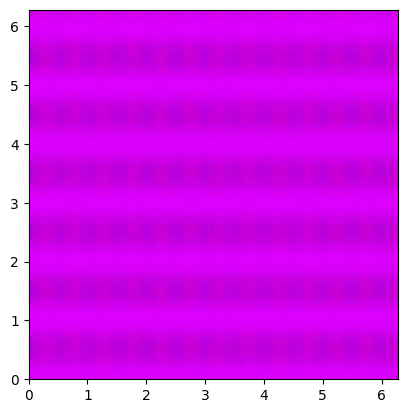

In [7]:
import numpy as np
x = np.linspace(0, 2*np.pi, 100)
y = np.linspace(0, 2*np.pi, 100)
X, Y = np.meshgrid(x, y)

xs = np.array([X.ravel(), Y.ravel()]).T
ks, _ = compiled.spherical_2d(xs)
res = compiled.eval_integrated_counterterm(ks)
xs = (X + Y*1j).reshape(100,100)
res = res.reshape(100,100)

plot_util.plot_complex_plane(xs, res)

In [8]:
print(compiled.integrate_naive(epochs=50, samples_per_epoch=50_000))
print(compiled.get_reference())

100%|██████████| 50/50 [00:12<00:00,  3.95it/s]

ComplexIntegratorResult:
value = (-0.000981±0.000005) + i(0.000379±0.000005)
relative absolute error = 0.71% , convergence=11.210, iters=2500000
(-0.0010649568282309735+0.00036904840646266764j)
########################################################################
#                                                                      #
#                        You are using OneLOop                         #
#                                                                      #
# for the evaluation of 1-loop scalar 1-, 2-, 3- and 4-point functions #
#                                                                      #
# author: Andreas van Hameren <hamerenREMOVETHIS@ifj.edu.pl>           #
#   date: 2024-11-23                                                   #
#                                                                      #
# Please cite                                                          #
#    A. van Hameren,                                                   #
#  

                    #
# in publications with results obtained with the help of this program. #
#                                                                      #
########################################################################


In [9]:
print(compiled.integrate_subtracted(epochs = 50, samples_per_epoch=20_000))

100%|██████████| 50/50 [00:06<00:00,  8.19it/s]

ComplexIntegratorResult:
value = (-0.000167±0.000003) + i(-0.001305±0.000002)
relative absolute error = 0.3% , convergence=3.048, iters=1000000


In [10]:
print(compiled.integrate_counterterm(epochs=50, samples_per_epoch=20_000))

  0%|          | 0/50 [00:00<?, ?it/s]

100%|██████████| 50/50 [00:07<00:00,  6.70it/s]

ComplexIntegratorResult:
value = (-0.001781±0.000000) + i(0.003497±0.000000)
relative absolute error = 0.0098% , convergence=0.098, iters=1000000
